In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import os 

from PIL import Image
from scipy import ndimage as nd
from tkinter import Tcl

from poreUtils import *

In [2]:
# write a function to load volume from the path

def load_volume(volume_path, clip_low=0.0005, clip_high=0.003):
    """Load the volume from the path provided.

    Args:
    volume_path (str): Path to the volume.
    clip_low (float, optional): Minimum value to clip the data. Defaults to 0.0005.
    clip_high (float, optional): Maximum value to clip the data. Defaults to 0.003.

    Returns:
    vol (numpy array): The volume loaded from the path.

    Raises:
    Exception: If the path does not exist, raises an exception.
    """
    try:
        tiffs = os.listdir(volume_path)

        slices = Tcl().call('lsort', '-dict', tiffs)
        shape = Image.open(os.path.join(volume_path, slices[0])).size
        vol = np.empty(shape=(len(slices), shape[0], shape[1]), dtype=np.uint8)

        for i, fname in enumerate(slices):
            im = Image.open(os.path.join(volume_path, fname))
            imarray = np.array(im)
            imarray = np.clip(imarray, clip_low, clip_high)
            imarray = norm8bit(imarray)
            vol[i, :, :] = imarray

        return vol

    except:
        raise Exception(f"{volume_path} : path does not exists")

In [3]:
scan_path = 'D:\\sagar\\Data\\MD_1264_A2_1_Z3.3mm\\roi\\1000-1300x1000-1300x2000-2300'

In [4]:
vol = load_volume(scan_path)

In [5]:
th_vol = vol > 55 

In [8]:
import numpy as np

# Create a 3D NumPy volume
vol = np.random.rand(10, 10, 10)

# Specify the threshold value
threshold = 0.5

# Use the numpy.where() function to get the coordinates of the values above the threshold
coords = np.where(vol > threshold)

# Get the voxel values that are above the threshold using the coordinates
values = vol[coords]

# Create a list of tuples containing the coordinates and values
results = [(coord[0], coord[1], coord[2], value) for coord, value in zip(np.transpose(coords), values)]

# Print the list of results
print(results)



[(0, 0, 0, 0.9797600553175179), (0, 0, 2, 0.7398954694672814), (0, 0, 4, 0.5919373446839884), (0, 0, 6, 0.6896337688697456), (0, 0, 7, 0.6565727609757379), (0, 0, 8, 0.5660423383683155), (0, 1, 0, 0.5367419336154091), (0, 1, 2, 0.8499525082386966), (0, 1, 3, 0.6495147352705342), (0, 1, 4, 0.5218190363278442), (0, 1, 7, 0.784539380744007), (0, 1, 9, 0.7289424660786278), (0, 2, 0, 0.6325667705699325), (0, 2, 2, 0.5431789476138474), (0, 2, 5, 0.8261414096099142), (0, 3, 0, 0.7019649033059823), (0, 3, 1, 0.9811973130187014), (0, 3, 2, 0.577693080618856), (0, 3, 3, 0.772297745101351), (0, 3, 4, 0.7396217248246268), (0, 3, 5, 0.948834670873442), (0, 3, 7, 0.8153777706694981), (0, 4, 0, 0.5485056371921107), (0, 4, 1, 0.6630171210170576), (0, 4, 2, 0.8053715089510908), (0, 4, 3, 0.5997387572199431), (0, 4, 4, 0.7651609645891829), (0, 4, 5, 0.5820863152365137), (0, 4, 6, 0.6469928877675944), (0, 4, 9, 0.8260496304592807), (0, 5, 2, 0.9043596134244285), (0, 5, 3, 0.986855231913992), (0, 5, 4, 0.

In [9]:
import numpy as np
from scipy.ndimage import label

# Create a 3D NumPy volume
vol = np.random.rand(3, 3, 3)
print(vol)

# Specify the threshold value
threshold = 0.5

# Use the numpy.where() function to get the coordinates of the values above the threshold
coords = np.where(vol > threshold)

# Create a binary array with 1's in the coordinates that are above the threshold
bin_array = np.zeros_like(vol)
bin_array[coords] = 1

# Label the connected components in the binary array
labels, num_labels = label(bin_array)

# Create a list of lists containing the coordinates of each connected component
connected_components = []
for i in range(1, num_labels + 1):
    component_coords = np.transpose(np.where(labels == i))
    connected_components.append(component_coords.tolist())

# Print the list of connected components
print(connected_components)

[[[0.74681173 0.04583027 0.21136938]
  [0.84818723 0.61324909 0.73338508]
  [0.32725066 0.03734303 0.35164002]]

 [[0.32392776 0.55736335 0.31774716]
  [0.63793192 0.10603097 0.08190778]
  [0.08214156 0.04788745 0.88742824]]

 [[0.50930529 0.57911491 0.80501378]
  [0.4012353  0.72744552 0.82467835]
  [0.35902671 0.78791113 0.10193532]]]
[[[0, 0, 0], [0, 1, 0], [0, 1, 1], [0, 1, 2], [1, 1, 0]], [[1, 0, 1], [2, 0, 0], [2, 0, 1], [2, 0, 2], [2, 1, 1], [2, 1, 2], [2, 2, 1]], [[1, 2, 2]]]


In [18]:
import numpy as np
from scipy.ndimage import label

# Create a 3D NumPy volume
vol = np.random.rand(100, 100)
#print(vol)

# Specify the threshold value
threshold = 0.7

# Use the numpy.where() function to get the coordinates of the values above the threshold
coords = np.where(vol > threshold)

# Create a binary array with 1's in the coordinates that are above the threshold
bin_array = np.zeros_like(vol)
bin_array[coords] = 1

# Label the connected components in the binary array
labels, num_labels = label(bin_array)

# Create a list of tuples containing the coordinates, intensity, label, and voxel values of each connected component
connected_components = []
for i in range(1, num_labels + 1):
    component_coords = np.transpose(np.where(labels == i))
    intensity = np.sum(vol[labels == i])
    voxel_values = vol[labels == i].tolist()
    connected_components.append((component_coords.tolist(), intensity, i, voxel_values))

# Print the list of connected components
print(connected_components)


[([[0, 0]], 0.9888082660208795, 1, [0.9888082660208795]), ([[0, 5]], 0.8733384655421851, 2, [0.8733384655421851]), ([[0, 10]], 0.943464857718926, 3, [0.943464857718926]), ([[0, 14], [0, 15], [0, 16]], 2.354520508559189, 4, [0.7700052298031451, 0.7377997120916039, 0.8467155666644398]), ([[0, 19], [1, 19]], 1.7521116071091116, 5, [0.9631656335776456, 0.788945973531466]), ([[0, 24]], 0.7016837124277379, 6, [0.7016837124277379]), ([[0, 28], [0, 29], [1, 28], [2, 28]], 3.176361397981589, 7, [0.8107514361213363, 0.74164532351722, 0.8607632352096054, 0.7632014031334272]), ([[0, 31]], 0.9739205106598496, 8, [0.9739205106598496]), ([[0, 34]], 0.8310261187496024, 9, [0.8310261187496024]), ([[0, 36], [1, 36], [1, 37]], 2.5498810465937765, 10, [0.8269557054401915, 0.747355238784068, 0.9755701023695172]), ([[0, 41]], 0.7914744978981421, 11, [0.7914744978981421]), ([[0, 44]], 0.9067192706007937, 12, [0.9067192706007937]), ([[0, 47], [1, 46], [1, 47], [1, 48], [1, 49], [2, 45], [2, 46], [2, 49], [3, 

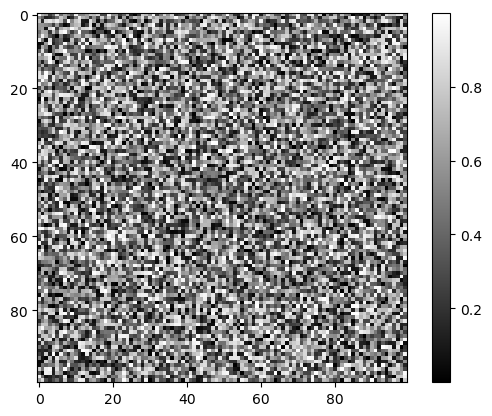

In [19]:
%matplotlib inline
plt.imshow(vol, cmap='gray')
plt.colorbar()
plt.show()

In [33]:
for c in connected_components[0:10]:
    #print(c[3])
    if len(c[0]) > 2:
        for cor in c[0]:
            print(cor)
        print('end')
        
        

[0, 14]
[0, 15]
[0, 16]
end
[0, 28]
[0, 29]
[1, 28]
[2, 28]
end
[0, 36]
[1, 36]
[1, 37]
end


In [35]:
import matplotlib 

In [37]:
matplotlib.__version__

'3.6.3'